# Tutorial for `GeoCroissant` with NetCDF Support 🥐 - Solar Dynamics Observatory (SDO)

## Introduction

<img src="../asset/GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

GeoCroissant extends Croissant with geospatial concepts (e.g., spatial extents, coordinate reference systems, temporal coverage), enabling rich, location-aware metadata for Earth-observation and other spatial datasets. It also supports heliophysics data like solar observations.

**NetCDF Support**: This tutorial demonstrates how GeoCroissant works with NetCDF (Network Common Data Form) files, a standard format for array-oriented scientific data commonly used in climate science, oceanography, and space weather research. NetCDF offers self-describing data with embedded metadata, efficient storage, and platform-independent access.

**Solar Dynamics Observatory (SDO)**: SDO is a NASA mission studying the Sun with multiple instruments providing continuous full-disk observations since 2010. This tutorial showcases the **ML-Ready Multi-Modal Image Dataset from SDO** (also known as **Surya-Bench Core Dataset**), which provides machine learning-ready solar data covering observations from **May 13, 2010, to Dec 31, 2024**. 

The dataset includes Level-1.5 processed data from:
- **Atmospheric Imaging Assembly (AIA)**: 8 extreme ultraviolet (EUV) wavelength channels capturing the solar atmosphere at different temperatures
- **Helioseismic and Magnetic Imager (HMI)**: 5 magnetic field measurements including vector magnetograms and Doppler velocity

This dataset is designed for large-scale learning applications in heliophysics, such as space weather forecasting, unsupervised representation learning, and scientific foundation model development.

In [12]:
# Install required packages
!pip install -q mlcroissant netCDF4 hdf5plugin "sunpy[visualization]" xarray


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


## Dataset Overview: ML-Ready Multi-Modal SDO Dataset (Surya-Bench)

### Access Information:
- **AWS Registry**: https://registry.opendata.aws/surya-bench/
- **S3 Bucket**: `s3://nasa-surya-bench/`
- **AWS CLI Access** (no account required): 
  ```bash
  aws s3 ls --no-sign-request s3://nasa-surya-bench/
  ```

# Creating GeoCroissant Metadata for the SDO Dataset

Let's create comprehensive GeoCroissant metadata for the **ML-Ready Multi-Modal SDO Dataset** (Surya-Bench core dataset). This metadata describes the synchronized observations from AIA and HMI instruments available through AWS Open Data.

This dataset uses **NetCDF4 format** to store multi-instrument solar observations, making it ideal for demonstrating GeoCroissant's support for NetCDF files in heliophysics research.

We'll generate the metadata automatically using our Python converter that:
- Extracts variable information from NetCDF files
- Generates spectral band metadata for AIA channels
- Creates proper field definitions for all 13 variables
- Includes AWS S3 distribution information
- Validates against Croissant 1.1 and GeoCroissant 1.0 standards

## Using the SDO GeoCroissant Converter

We provide a Python converter (`sdo_converter.py`) that automatically generates GeoCroissant metadata from NetCDF files:

The converter:
- **Automatically extracts** variable metadata from NetCDF files
- **Generates spectral band info** for all 8 AIA wavelength channels
- **Creates field definitions** with proper data types and descriptions
- **Validates** the output against GeoCroissant schema
- **Includes** spatial/temporal resolution and coordinate systems

In [1]:
from sdo_converter import SDOGeoCroissantConverter

# Point to your local SDO data directory
converter = SDOGeoCroissantConverter('./core-sdo/infer_data')

# Generate GeoCroissant metadata
converter.generate_geocroissant('sdo_geocroissant.json')

{'@context': {'@language': 'en',
  '@vocab': 'https://schema.org/',
  'citeAs': 'cr:citeAs',
  'column': 'cr:column',
  'conformsTo': 'dct:conformsTo',
  'cr': 'http://mlcommons.org/croissant/',
  'geocr': 'http://mlcommons.org/croissant/geo/',
  'rai': 'http://mlcommons.org/croissant/RAI/',
  'dct': 'http://purl.org/dc/terms/',
  'sc': 'https://schema.org/',
  'data': {'@id': 'cr:data', '@type': '@json'},
  'examples': {'@id': 'cr:examples', '@type': '@json'},
  'dataBiases': 'cr:dataBiases',
  'dataCollection': 'cr:dataCollection',
  'dataType': {'@id': 'cr:dataType', '@type': '@vocab'},
  'extract': 'cr:extract',
  'field': 'cr:field',
  'fileProperty': 'cr:fileProperty',
  'fileObject': 'cr:fileObject',
  'fileSet': 'cr:fileSet',
  'format': 'cr:format',
  'includes': 'cr:includes',
  'isLiveDataset': 'cr:isLiveDataset',
  'jsonPath': 'cr:jsonPath',
  'key': 'cr:key',
  'md5': 'cr:md5',
  'parentField': 'cr:parentField',
  'path': 'cr:path',
  'personalSensitiveInformation': 'cr:pe

In [2]:
import json

# Load the generated GeoCroissant metadata
with open("sdo_geocroissant.json", "r") as f:
    metadata = json.load(f)

# Display key information
print("SDO GeoCroissant Metadata Summary:")
print(f"  Dataset: {metadata['name']}")
print(f"  Temporal Coverage: {metadata['temporalCoverage']}")
print(f"  Spatial Resolution: {metadata['geocr:spatialResolution']['value']} {metadata['geocr:spatialResolution']['unitText']}")
print(f"  Variables: {len(metadata['recordSet'][0]['field'])} total (8 AIA + 5 HMI)")
print(f"  Spectral Bands: {len(metadata['geocr:spectralBandMetadata'])} AIA channels")
print("  ✓ Metadata validated successfully!")

SDO GeoCroissant Metadata Summary:
  Dataset: SDO Multi-Instrument Solar Observations
  Temporal Coverage: 2011-01-20/2019-01-23
  Spatial Resolution: 0.6 arcsec/pixel
  Variables: 13 total (8 AIA + 5 HMI)
  Spectral Bands: 8 AIA channels
  ✓ Metadata validated successfully!


## Validating GeoCroissant Metadata

When creating `Metadata`:
- We check for errors in the configuration using the mlcroissant validator.
- We generate warnings if the configuration doesn't follow guidelines and best practices.

Let's validate our SDO GeoCroissant metadata:

In [4]:
!mlcroissant validate --jsonld=sdo_geocroissant.json

I0218 10:38:07.837888 138339818178048 validate.py:53] Done.


The validation confirms our GeoCroissant metadata is correctly structured! 

Key features of this NetCDF-based GeoCroissant metadata:

- **Format**: NetCDF4 files (application/x-netcdf)
- **Instruments**: AIA (8 EUV channels) + HMI (5 magnetic field variables)
- **Spectral Bands**: 8 AIA wavelength channels (94Å to 1600Å)
- **Spatial Resolution**: 0.6 arcsec/pixel
- **Image Size**: 4096x4096 pixels (full solar disk)
- **Data Structure**: 
  - Each NetCDF file contains 13 variables (8 AIA + 5 HMI)
  - Variables stored as 2D arrays with embedded metadata
  - Data units: DN/s (AIA), Gauss (HMI magnetic), m/s (HMI velocity)
- **Band Configuration**: Properly defined with `geocr:bandNamesList` for each variable
- **Coordinate Reference System**: Helioprojective-Cartesian (HPC)
- **Temporal Coverage**: 2011-01-20 to 2019-01-23 with 12-minute cadence

# Example: Loading the SDO Dataset

Now that we have our GeoCroissant metadata, we can load the NetCDF dataset files and inspect their structure.

In [7]:
import netCDF4
import glob
from pathlib import Path

# Load metadata and find NetCDF files
with open("sdo_geocroissant.json", "r") as f:
    metadata = json.load(f)

data_dir = metadata['distribution'][0]['contentUrl']
nc_files = sorted(glob.glob(f"{data_dir}/*.nc"))

print(f"Found {len(nc_files)} NetCDF files")
print(f"Temporal Coverage: {metadata['temporalCoverage']}")

# Inspect first file structure
if nc_files:
    with netCDF4.Dataset(nc_files[0], 'r') as nc:
        print(f"\nFile: {Path(nc_files[0]).name}")
        print(f"  Dimensions: {dict(nc.dimensions)}")
        print(f"  Variables: {', '.join(nc.variables.keys())}")

Found 15 NetCDF files
Temporal Coverage: 2011-01-20/2019-01-23

File: 20110120_0100.nc
  Dimensions: {'y': "<class 'netCDF4.Dimension'>": name = 'y', size = 4096, 'x': "<class 'netCDF4.Dimension'>": name = 'x', size = 4096}
  Variables: aia94, aia131, aia171, aia193, aia211, aia304, aia335, aia1600, hmi_m, hmi_bx, hmi_by, hmi_bz, hmi_v


# Example: Visualizing SDO Multi-Wavelength Solar Observations

After loading the NetCDF data, we'll visualize multiple AIA wavelength channels and HMI magnetic field data to showcase the multi-instrument nature of the SDO dataset.

**Professional SunPy Colormaps**: This visualization uses the **SunPy library's official SDO colormaps**, which are the scientific standard for solar imaging. Each AIA wavelength has a custom colormap designed to highlight features at that temperature regime, and HMI magnetograms use a diverging colormap to show magnetic polarity.

The visualization demonstrates:
- **AIA channels** at different wavelengths (94Å, 171Å, 193Å, 304Å) with proper `sdoaia###` colormaps
- **HMI magnetogram** displaying magnetic field structure with `hmimag` colormap
- **RGB composite** combining multiple wavelengths for context
- **Proper normalization** matching professional solar physics standards (1st-99.5th percentile)

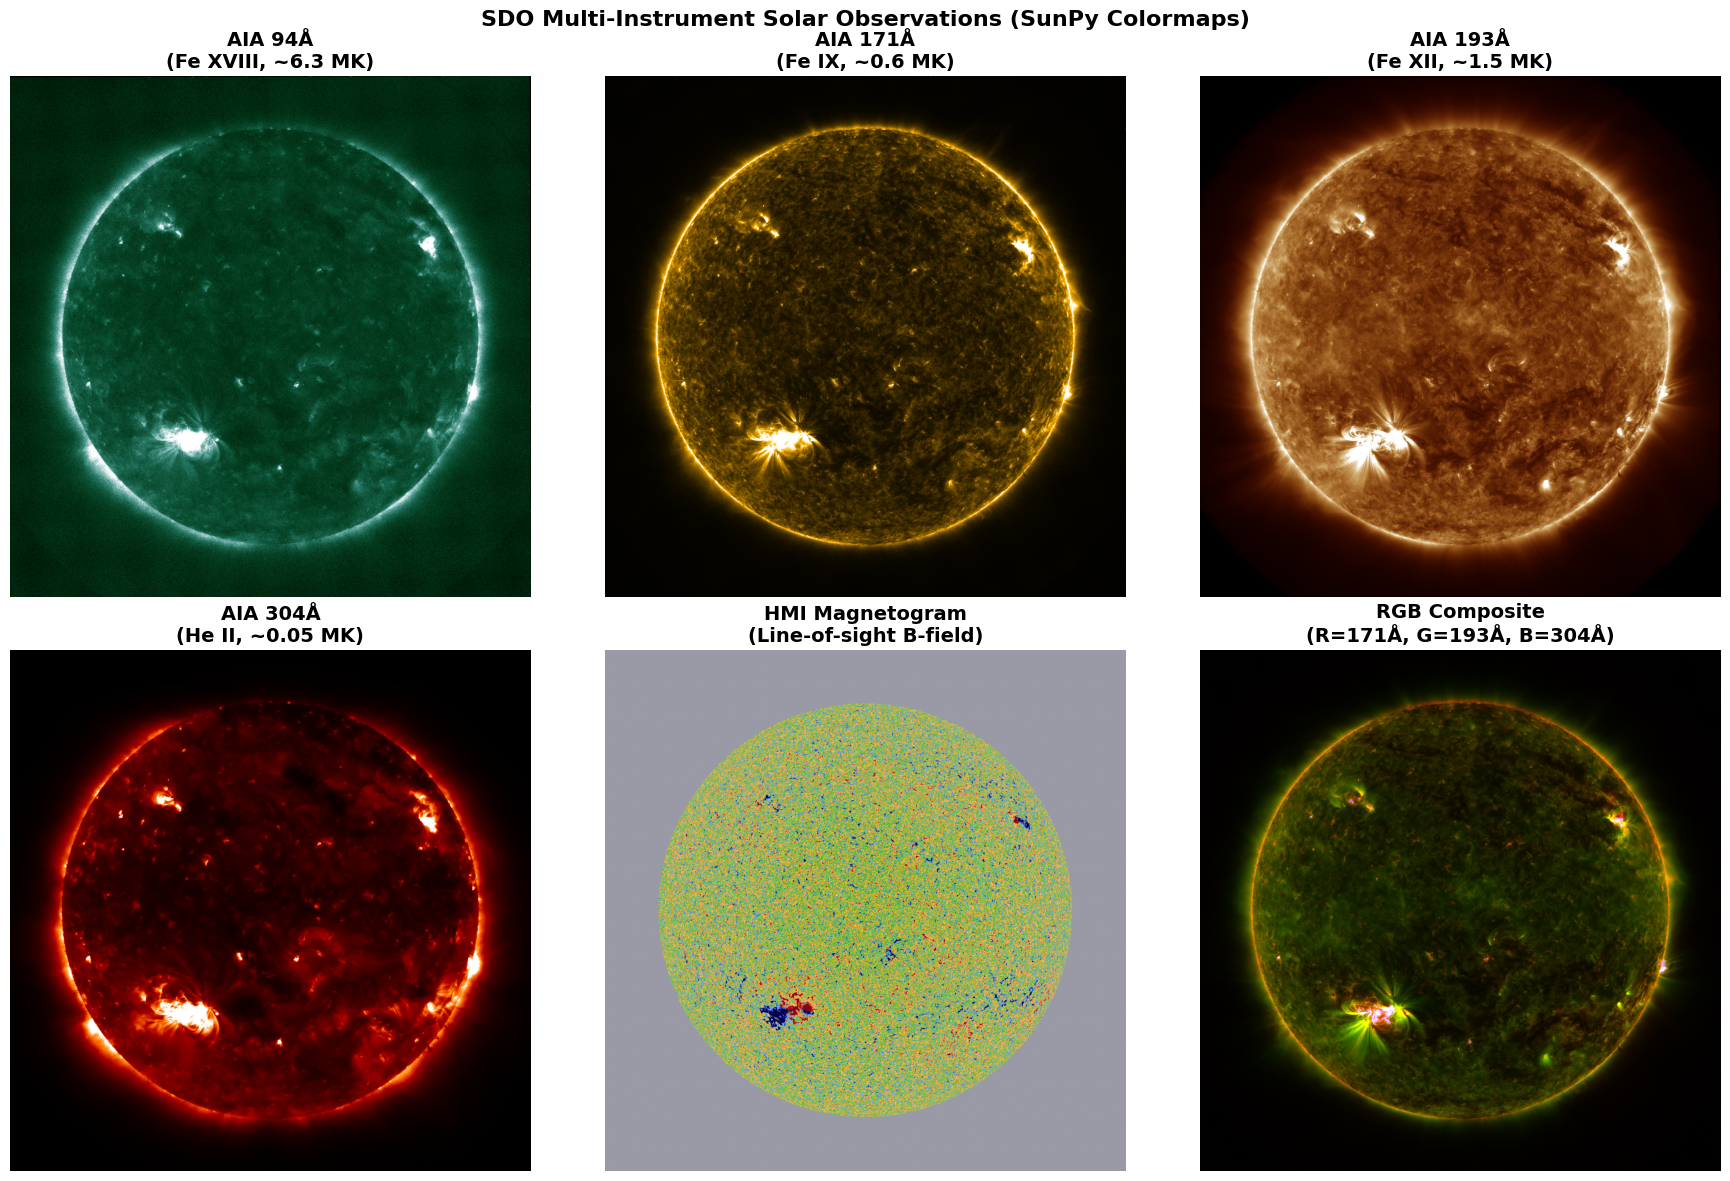

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sunpy.visualization.colormaps as sunpy_cm
import hdf5plugin  # Required to enable HDF5 compression filters
import glob
import json
import xarray as xr

# Load metadata to extract variable information
with open("sdo_geocroissant.json", "r") as f:
    metadata = json.load(f)

# Find NetCDF files
data_dir = metadata['distribution'][0]['contentUrl']
nc_files = sorted(glob.glob(f"{data_dir}/*.nc"))

# Extract variable names from metadata
fields = metadata['recordSet'][0]['field']
aia_vars = [f['name'] for f in fields if 'aia' in f['name']][:4]
hmi_vars = [f['name'] for f in fields if 'hmi' in f['name']][:1]

# Load NetCDF data using xarray with h5netcdf engine
ds = xr.open_dataset(nc_files[0], engine='h5netcdf')
aia94 = ds[aia_vars[0]].values
aia171 = ds[aia_vars[1]].values
aia193 = ds[aia_vars[2]].values
aia304 = ds[aia_vars[3]].values
hmi_m = ds[hmi_vars[0]].values
ds.close()

# Create visualization with proper SunPy colormaps
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

def display_channel(ax, data, title, colormap_name):
    """Display a channel with proper SunPy colormap normalization"""
    # Calculate normalization range
    vmin = np.percentile(data[np.isfinite(data)], 1)
    vmax = np.percentile(data[np.isfinite(data)], 99.5)
    
    # Normalize data to [0, 1] range
    normalized = np.clip((data - vmin) / (vmax - vmin), 0, 1)
    
    # Apply SunPy colormap
    cmap = sunpy_cm.cmlist[colormap_name]
    colored_data = cmap(normalized[::-1])  # Flip vertically for proper orientation
    
    im = ax.imshow(colored_data, origin='lower')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')

# Display AIA EUV channels with proper SunPy colormaps
display_channel(axes[0, 0], aia94, 'AIA 94Å\n(Fe XVIII, ~6.3 MK)', 'sdoaia94')
display_channel(axes[0, 1], aia171, 'AIA 171Å\n(Fe IX, ~0.6 MK)', 'sdoaia171')
display_channel(axes[0, 2], aia193, 'AIA 193Å\n(Fe XII, ~1.5 MK)', 'sdoaia193')
display_channel(axes[1, 0], aia304, 'AIA 304Å\n(He II, ~0.05 MK)', 'sdoaia304')

# Display HMI magnetogram with proper symmetric colormap
vmax_mag = np.percentile(np.abs(hmi_m[np.isfinite(hmi_m)]), 99)
normalized_mag = np.clip((hmi_m + vmax_mag) / (2 * vmax_mag), 0, 1)
cmap_mag = sunpy_cm.cmlist['hmimag']
colored_mag = cmap_mag(normalized_mag[::-1])

axes[1, 1].imshow(colored_mag, origin='lower')
axes[1, 1].set_title('HMI Magnetogram\n(Line-of-sight B-field)', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

# Create RGB composite using normalized SunPy colormap outputs
def normalize_for_rgb(data):
    """Normalize data for RGB composite creation"""
    vmin = np.percentile(data[np.isfinite(data)], 1)
    vmax = np.percentile(data[np.isfinite(data)], 99.9)
    return np.clip((data - vmin) / (vmax - vmin), 0, 1)

# Apply SunPy colormaps and extract RGB channels
aia171_colored = sunpy_cm.cmlist['sdoaia171'](normalize_for_rgb(aia171))
aia193_colored = sunpy_cm.cmlist['sdoaia193'](normalize_for_rgb(aia193))
aia304_colored = sunpy_cm.cmlist['sdoaia304'](normalize_for_rgb(aia304))

# Combine into RGB composite (using luminance from each colored channel)
rgb = np.zeros((*aia171.shape, 3))
rgb[:, :, 0] = aia171_colored[:, :, 0]  # Red channel from 171Å
rgb[:, :, 1] = aia193_colored[:, :, 1]  # Green channel from 193Å
rgb[:, :, 2] = aia304_colored[:, :, 2]  # Blue channel from 304Å

axes[1, 2].imshow(rgb[::-1], origin='lower')
axes[1, 2].set_title('RGB Composite\n(R=171Å, G=193Å, B=304Å)', fontsize=14, fontweight='bold')
axes[1, 2].axis('off')

plt.suptitle('SDO Multi-Instrument Solar Observations (SunPy Colormaps)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()